<a href="https://colab.research.google.com/github/baloerrr04/sklearn-linear-regression-ads/blob/main/linear_regression_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [42]:
df = pd.read_excel('/content/linear_regression_ads.xlsx')

print(df.head())

   TV_Ads_Budget  Radio_Ads_Budget  Social_Media_Ads_Budget  \
0           1176                28                       77   
1            910               148                      192   
2           1344               155                      193   
3           1180                82                      132   
4           1145               158                      154   

   Number_of_Customers  
0                569.8  
1                635.4  
2                822.0  
3                676.8  
4                729.0  


       TV_Ads_Budget  Radio_Ads_Budget  Social_Media_Ads_Budget  \
count      100.00000        100.000000                100.00000   
mean       779.15000        161.540000                121.26000   
std        424.74207         76.617431                 50.02941   
min         63.00000         21.000000                 11.00000   
25%        391.50000         96.250000                 89.25000   
50%        822.00000        157.000000                130.50000   
75%       1135.25000        237.000000                157.00000   
max       1487.00000        287.000000                198.00000   

       Number_of_Customers  
count           100.000000  
mean            554.462000  
std             183.226373  
min             168.400000  
25%             386.100000  
50%             560.100000  
75%             710.200000  
max             900.400000  


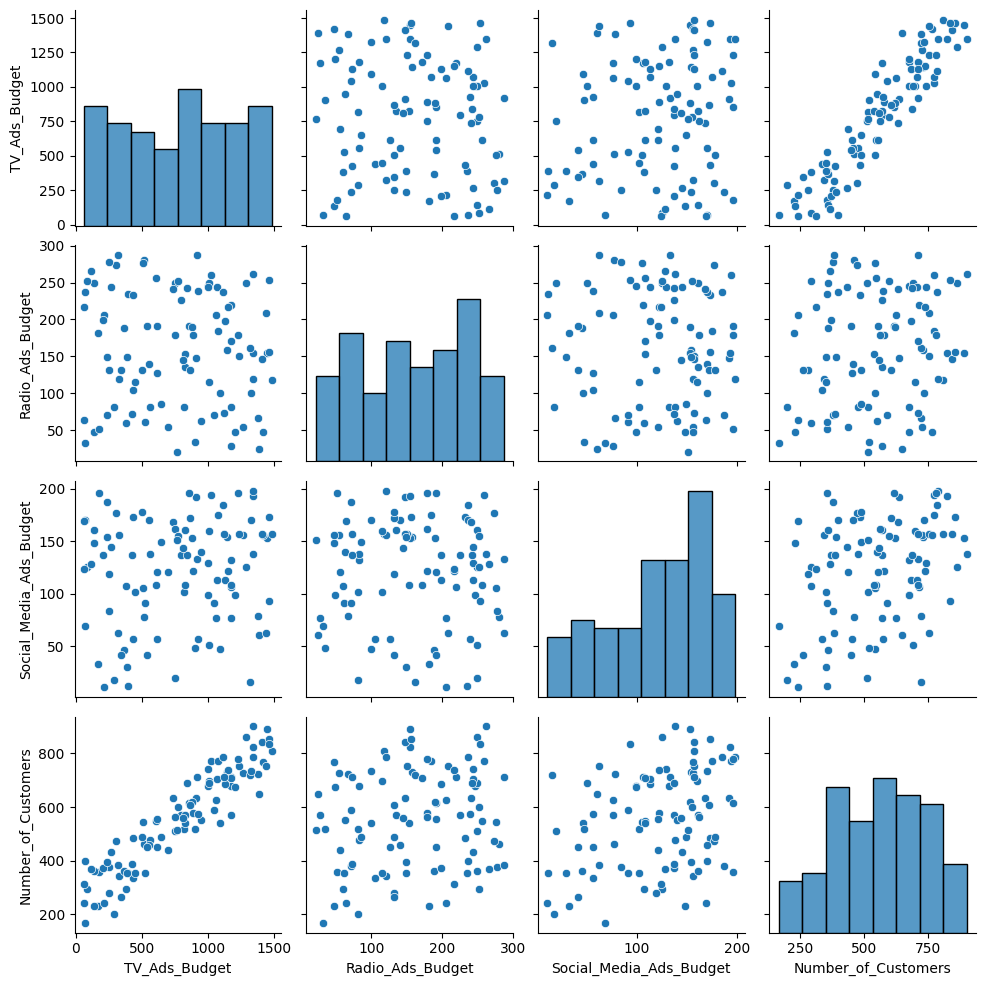

In [39]:
print(df.describe())  # Melihat ringkasan statistik data
sns.pairplot(df)  # Visualisasi hubungan antar fitur
plt.show()

In [48]:
scaler = MinMaxScaler()

# X = df[["TV_Ads_Budget", "Radio_Ads_Budget", "Social_Media_Ads_Budget"]]

# y = df['Number_of_Customers']

features = ["TV_Ads_Budget", "Radio_Ads_Budget", "Social_Media_Ads_Budget"]
df_scaled = df.copy()

df_scaled[features] = scaler.fit_transform(df[features])
print(df_scaled.head())

   TV_Ads_Budget  Radio_Ads_Budget  Social_Media_Ads_Budget  \
0       0.781601          0.026316                 0.352941   
1       0.594803          0.477444                 0.967914   
2       0.899579          0.503759                 0.973262   
3       0.784410          0.229323                 0.647059   
4       0.759831          0.515038                 0.764706   

   Number_of_Customers  
0                569.8  
1                635.4  
2                822.0  
3                676.8  
4                729.0  


In [51]:
X = df_scaled[features]
y = df_scaled['Number_of_Customers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [53]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  117.32596931033851
Coefficients:  [565.92030455 140.99298424 138.51882006]


In [60]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

MAE: 24.15941689363551
R2 Score: 0.9769832375066474


In [59]:
# Testing with new Data

new_data = pd.DataFrame({
    'TV_Ads_Budget': [1200, 300, 850, 450, 1300],
    'Radio_Ads_Budget': [250, 90, 200, 150, 270],
    'Social_Media_Ads_Budget': [180, 50, 140, 100, 190]
})

new_data_scaled = scaler.transform(new_data)  # Gunakan scaler yang sudah dipakai sebelumnya

predictions = model.predict(new_data_scaled)

# Konversi hasil prediksi ke DataFrame
new_data['Predicted_Number_of_Customers'] = predictions
print(new_data)

   TV_Ads_Budget  Radio_Ads_Budget  Social_Media_Ads_Budget  \
0           1200               250                      180   
1            300                90                       50   
2            850               200                      140   
3            450               150                      100   
4           1300               270                      190   

   Predicted_Number_of_Customers  
0                     815.754534  
1                     276.975868  
2                     620.526818  
3                     405.428306  
4                     873.504528  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-58-edcd54ef9ea3>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


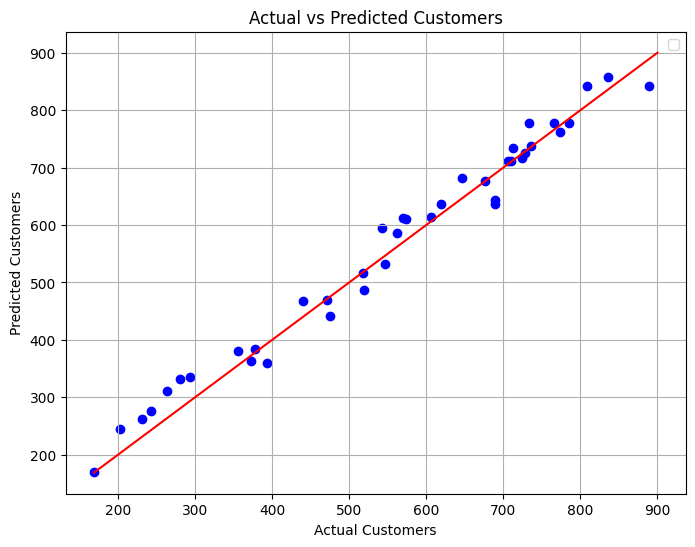

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Customers')
plt.ylabel('Predicted Customers')
plt.title('Actual vs Predicted Customers')
plt.legend()
plt.grid(True)
plt.show()